In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.patches as mpatches

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [28]:
#df_DA_US['job_country'].value_counts().head()

job_country
United States    4350
Name: count, dtype: int64

In [29]:
job_roles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_top_countries = df[df['job_title_short'].isin(job_roles)].dropna(subset=['salary_year_avg']).copy()

In [32]:
df_top_countries['job_country'].value_counts(ascending=False).head()

job_country
United States     11818
Sudan              1189
India               355
Canada              253
United Kingdom      207
Name: count, dtype: int64

In [4]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_year_avg']).copy()

df_DA_US = df_DA_US.sort_values(by='salary_year_avg', ascending=False)

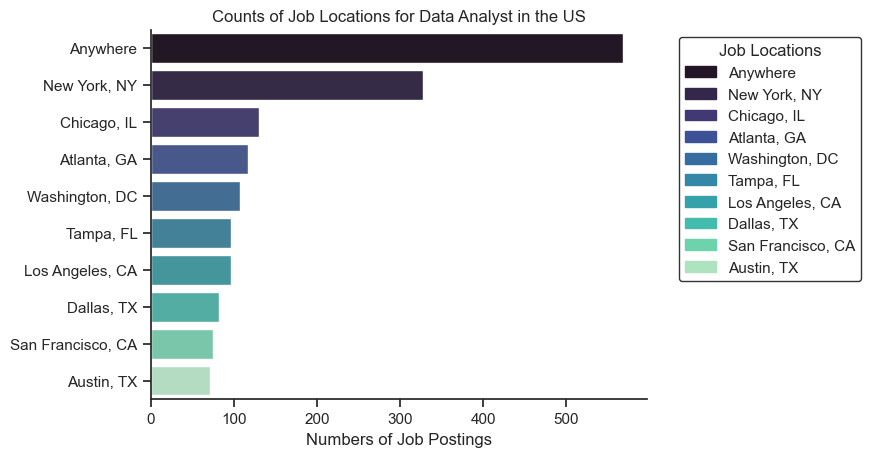

In [7]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame() # Siempre recuerda que para acceder puedes revisarlo de esta manera. Ya está limpio, sólo te muestra DA y en USA, junto con haber removido todos los NA.

sns.set_theme(style='ticks')
colors = sns.color_palette('mako', n_colors=len(df_plot))

sns.barplot(data=df_plot, x='count', y='job_location', palette=colors, hue='job_location', legend=False)
patches = [mpatches.Patch(color=colors[i], label=df_plot.index[i]) for i in range(len(df_plot))]
sns.despine()

plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Numbers of Job Postings')
plt.ylabel('')
plt.legend(handles=patches, title='Job Locations', bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor='black', fancybox=True)

plt.tight_layout
plt.show()

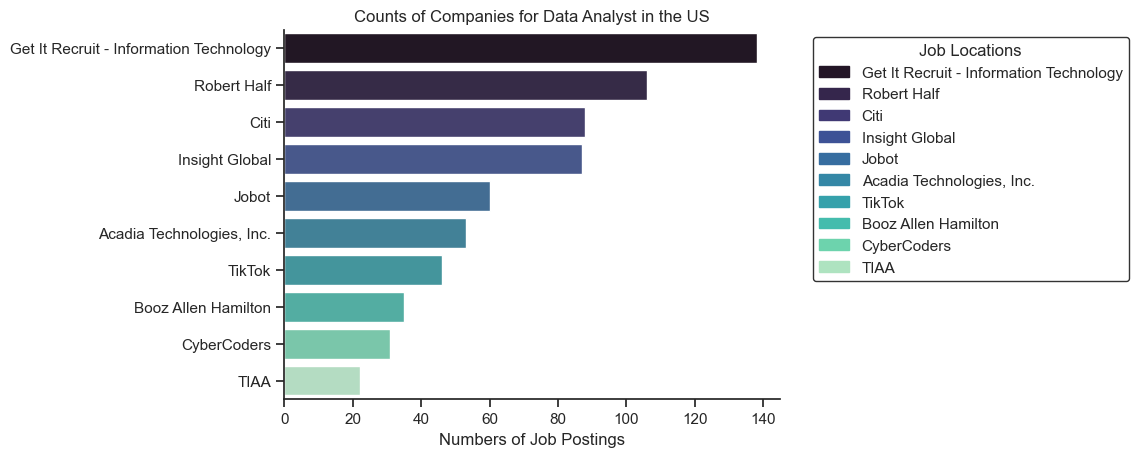

In [9]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame() # Siempre recuerda que para acceder puedes revisarlo de esta manera. Ya está limpio, sólo te muestra DA y en USA, junto con haber removido todos los NA.

sns.set_theme(style='ticks')
colors = sns.color_palette('mako', n_colors=len(df_plot))

sns.barplot(data=df_plot, x='count', y='company_name', palette=colors, hue='company_name', legend=False)
patches = [mpatches.Patch(color=colors[i], label=df_plot.index[i]) for i in range(len(df_plot))]
sns.despine()

plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Numbers of Job Postings')
plt.ylabel('')
plt.legend(handles=patches, title='Job Locations', bbox_to_anchor=(1.05, 1), loc='upper left', edgecolor='black', fancybox=True)

plt.tight_layout
plt.show()

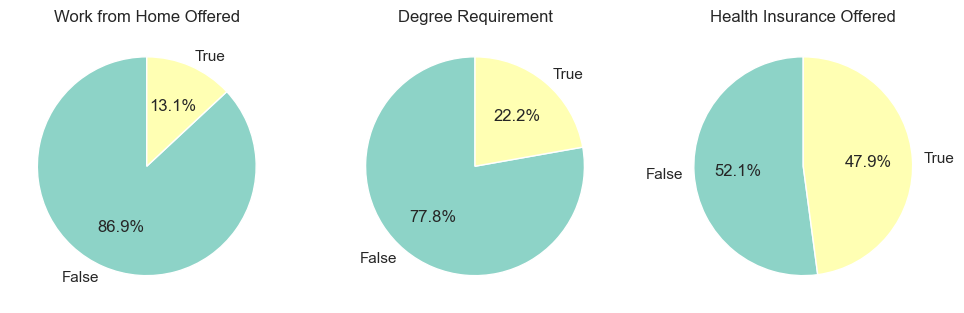

In [10]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
    ax[i].set_title(title)

plt.show()

#Excluding NaN in salary_year_avg. Not using it result in MORE information but is not clean.